[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/notebooks/notebook_06_metricas-published.ipynb)

# Evaluación

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from typing import Tuple, Any


## Matrices de confusión

Recordemos que una matriz de confusión nos permite observar el resultado de nuestra clasificación. Para armarla:
- cada fila los valores observados o reales
- cada columna los valores predichos

Y en cada celda:
- $m_{i,i}$ las instancias bien clasificadas
- $m_{i,j}\ (con\ i\neq j)$ las instancias mal clasificadas (era de instancia $i$ pero el clasificador dijo $j$)

Implementar la siguiente función para poder construir una matriz de confusión binaria. Deberá tomar la etiqueta que es considerada "éxito" como parámetro.

In [5]:
def confusion_matrix(y_real: list, y_predicted: list, positive_label: Any, show: bool = False) -> Tuple[int, int, int, int]:
    # Construye una matriz de confusión (binaria)
    # y_real es la secuencia de etiquetas reales
    # y_predicted es la secuencia de etiquetas predichas por el clasificador
    # positive_label indica cuál es la etiqueta considerada positiva.

    true_positives = sum(r == p == positive_label for r, p in zip(y_real, y_predicted))
    true_negatives = sum(r == p != positive_label for r, p in zip(y_real, y_predicted))
    false_positives = sum(r != positive_label and p == positive_label for r, p in zip(y_real, y_predicted))
    false_negatives = sum(r == positive_label and p != positive_label for r, p in zip(y_real, y_predicted))

    if show:
        df = pd.DataFrame(
            [[true_positives, false_negatives],
             [false_positives, true_negatives]],
            index=["real +", "real -"],
            columns=["pred +", "pred -"]
        )
        display(df)

    return true_positives, true_negatives, false_positives, false_negatives


### Test 1

Vamos a probar ahora la función. Sabiendo que se recibieron 990 emails. Y que se recibieron, en este orden:
  - 10 correos no deseados
  - 978 correos
  - 2 correos no deseados
  
El filtro anti-spam estableció las siguientes clasificaciones (también en órden):
  - 2 correos no deseados
  - 900 correos
  - 20 correos no deseados
  - 68 correos
  
Construir dos listas de strings que contengan `"spam"` o `"no-spam"` y que representen la etiqueta real (`y_real`) y la etiqueta predicha por el filtro anti-spam (`y_pred`).

In [7]:
# Etiquetas reales
y_real = ["spam"] * 10 + ["no-spam"] * 978 + ["spam"] * 2

# Etiquetas predichas
y_pred = ["spam"] * 2 + ["no-spam"] * 900 + ["spam"] * 20 + ["no-spam"] * 68

Correr la matriz de confusión y verificar que el resultado es el esperado.

In [8]:
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred, positive_label="spam", show=False)
# Si se cambia show a True se puede visualizar la matriz de confusión

print("Test 1")
print("(tp, tn, fp, fn) = ", (tp, tn, fp, fn))
assert((tp, tn, fp, fn) == (2, 958, 20, 10))
print("OK")

Test 1
(tp, tn, fp, fn) =  (2, 958, 20, 10)
OK


## Métricas

En esta sección trabajeremos con las métricas estándares de clasificación.

### Test 2
A continuacion completar las funciones que computan las distintas métricas

In [9]:
from typing import Tuple

def accuracy_score(tp: int, tn: int, fp: int, fn: int) -> float:
    # Accuracy mide el porcentaje de aciertos totales
    return (tp + tn) / (tp + tn + fp + fn)


def precision_score(tp: int, tn: int, fp: int, fn: int) -> float:
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0


def recall_score(tp: int, tn: int, fp: int, fn: int) -> float:
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0


def f_beta_score(tp: int, tn: int, fp: int, fn: int, beta: float) -> float:
    prec = precision_score(tp, tn, fp, fn)
    recl = recall_score(tp, tn, fp, fn)
    return (1 + beta**2) * (prec * recl) / (beta**2 * prec + recl) if (prec + recl) > 0 else 0.0


def f1_score(tp: int, tn: int, fp: int, fn: int) -> float:
    return f_beta_score(tp, tn, fp, fn, beta=1)


def all_metrics(tp: int, tn: int, fp: int, fn: int) -> Tuple[float, float, float, float]:
    accuracy = round(accuracy_score(tp, tn, fp, fn), 3)
    precision = round(precision_score(tp, tn, fp, fn), 3)
    recall = round(recall_score(tp, tn, fp, fn), 3)
    f1 = round(f1_score(tp, tn, fp, fn), 3)
    return accuracy, precision, recall, f1



Evaluar las funciones con el siguiente caso de test.

In [10]:
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred, positive_label="spam")
(accuracy, precision, recall, f1) = all_metrics(tp, tn, fp, fn)

print("Test 2")
print("(accuracy, precision, recall, f1) = ", (accuracy, precision, recall, f1))
assert((accuracy, precision, recall, f1) == (0.97, 0.091, 0.167, 0.118))
print("OK")

Test 2
(accuracy, precision, recall, f1) =  (0.97, 0.091, 0.167, 0.118)
OK


## Comparando predicciones

Sean los siguientes datos provenientes de 2 clasificadores (A y B) y el valor real de las etiquetas.

In [21]:
# Etiquetas reales
y_real = ["perro"] * 18 + ["gato"] * 980 + ["perro"] * 5

# Etiquetas devueltas por "clasificador A"
y_pred_A = ["gato"] * 980 + ["perro"] * 20 + ["gato"] * 3

# Etiquetas devueltas por "clasificador B"
y_pred_B = ["perro"] * 40 + ["gato"] * 900 + ["perro"] * 60 + ["gato"] * 3

df = pd.DataFrame(data={"y_real": y_real,
                           "y_pred_A": y_pred_A,
                           "y_pred_B": y_pred_B,
                          })


/tmp/ipython-input-1239905368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="y_real", data=df, palette="pastel")


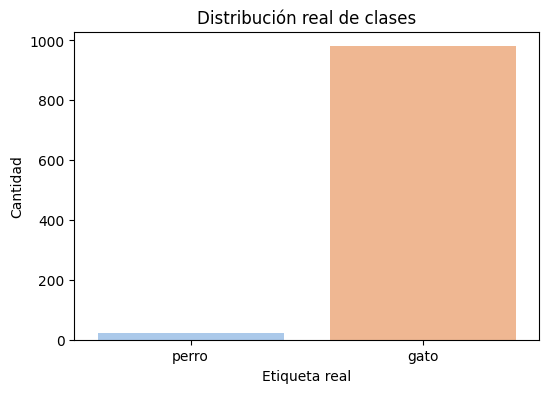

In [22]:
# Veamos como se distribuyen las cantidades de perros y gatos

import matplotlib.pyplot as plt
import seaborn as sns

# -------- Distribución real de clases --------
plt.figure(figsize=(6,4))
sns.countplot(x="y_real", data=df, palette="pastel")
plt.title("Distribución real de clases")
plt.xlabel("Etiqueta real")
plt.ylabel("Cantidad")
plt.show()

# Se puede ver que hay muchisima mas cantidad de gatos que de perros ... las clases estan desbalanceadas


In [23]:
n = len(y_real)  # debería dar 1003
print(n)

1003


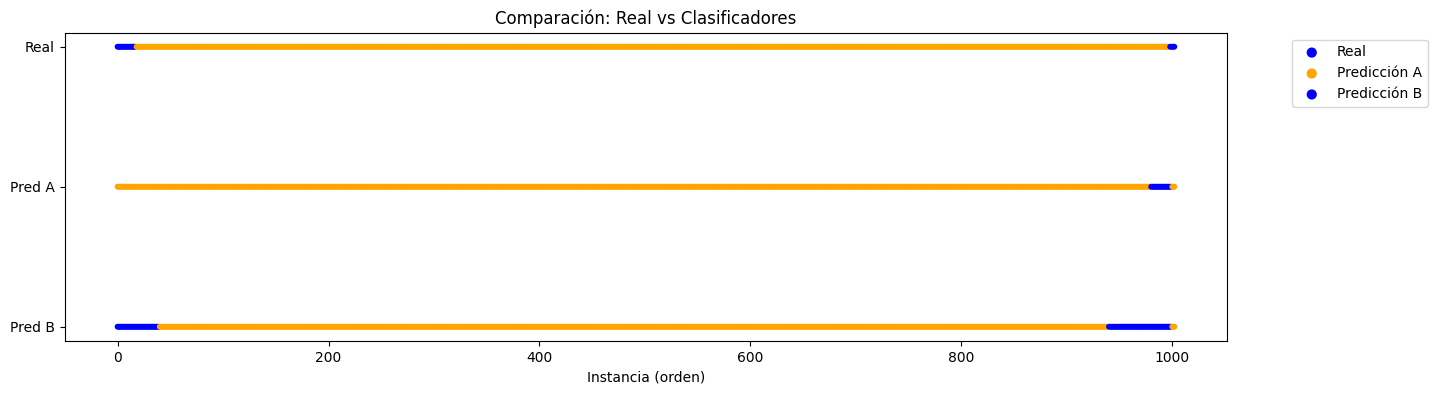

In [24]:
import matplotlib.pyplot as plt

color_map = {"gato": "orange", "perro": "blue"}
n = len(y_real)

plt.figure(figsize=(15, 4))

# Línea 1: etiquetas reales
plt.scatter(range(n), [3]*n, c=[color_map[y] for y in y_real], s=10, label="Real")

# Línea 2: predicciones Clasificador A
plt.scatter(range(n), [2]*n, c=[color_map[y] for y in y_pred_A], s=10, label="Predicción A")

# Línea 3: predicciones Clasificador B
plt.scatter(range(n), [1]*n, c=[color_map[y] for y in y_pred_B], s=10, label="Predicción B")

plt.yticks([1, 2, 3], ["Pred B", "Pred A", "Real"])
plt.xlabel("Instancia (orden)")
plt.title("Comparación: Real vs Clasificadores")
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [25]:


res = []
print("Clasificador A, etiqueta de éxito: gato")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_A, positive_label="gato", show=True)
res.append(all_metrics(tp, tn, fp, fn))

print("Clasificador B, etiqueta de éxito: gato")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_B, positive_label="gato", show=True)
res.append(all_metrics(tp, tn, fp, fn))

print("Clasificador A, etiqueta de éxito: perro")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_A, positive_label="perro", show=True)
res.append(all_metrics(tp, tn, fp, fn))

print("Clasificador B, etiqueta de éxito: perro")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_B, positive_label="perro", show=True)
res.append(all_metrics(tp, tn, fp, fn))

pd.DataFrame(res, columns=["accuracy", "precision", "recall", "f1"], index=["CLF A (gato)", "CLF B (gato)", "CLF A (perro)", "CLF B (gato)"])

Clasificador A, etiqueta de éxito: gato


,pred +,pred -
real +,962,18
real -,21,2


Clasificador B, etiqueta de éxito: gato


,pred +,pred -
real +,900,80
real -,3,20


Clasificador A, etiqueta de éxito: perro


,pred +,pred -
real +,2,21
real -,18,962


Clasificador B, etiqueta de éxito: perro


,pred +,pred -
real +,20,3
real -,80,900


,accuracy,precision,recall,f1
CLF A (gato),0.961,0.979,0.982,0.980
CLF B (gato),0.917,0.997,0.918,0.956
CLF A (perro),0.961,0.100,0.087,0.093
CLF B (gato),0.917,0.200,0.870,0.325


¿Qué podemos concluir con este experimento?

Podemos concluir que

- CLF A es mejor para gatos: alto precision + recall.

- CLF B es mejor para perros: alto recall, aunque sacrifica precisión.

- El accuracy es engañoso porque las clases están desbalanceadas (muchos más gatos que perros).

- La elección del “mejor” clasificador depende de qué clase nos importa más detectar y del costo de los errores:
...Si es más grave perder un perro (FN) → conviene CLF B.
...Si es más grave marcar gato como perro (FP) → conviene CLF A.

## Analizando $F_1$

A continuación realizamos un experimento variando levemente las condiciones en cada pasada.

El código que realiza el experimento es el siguiente:

In [27]:
y_real = ["perro"] * 100 + ["gato"] * 900 + ["perro"] * 80      # tenemos 180 perros y 900 gatos
y_pred =   ["perro"] * 80 + ["gato"] * 800 + ["perro"] * 200    # predecimos 280 perros y 800 gatos

# Sigue habiendo un desbalance de clases , hay muchos mas gatos que perros, pero no tan desbalanceado como el ejemplo anterior.

tns_gato = []
f1s_gato = []
f1s_perro = []
f1s_avg = []

# Armamos un loop para crear F1 a medida que vamos agregando mas perros de a uno

for i in range(0, 10000, 100):
    y_real_2 = y_real + ["perro"] * i
    y_pred_2 = y_pred + ["perro"] * i

    tp1, tn1, fp1, fn1 = confusion_matrix(y_real=y_real_2, y_predicted=y_pred_2, positive_label="gato")
    tp2, tn2, fp2, fn2 = confusion_matrix(y_real=y_real_2, y_predicted=y_pred_2, positive_label="perro")

    f1_gato = f1_score(tp1, tn1, fp1, fn1)
    f1_perro = f1_score(tp2, tn2, fp2, fn2)
    f1_avg = (f1_gato + f1_perro) / 2

    tns_gato.append(tn1)
    f1s_gato.append(f1_gato)
    f1s_perro.append(f1_perro)
    f1s_avg.append(f1_avg)

1. ¿Qué realiza este experimento?
1. ¿Qué relación existe entre la $F_1$ de perro y de gato a medida que se aumenta la cantidad de perros que tiene la muestra?
1. ¿En algún punto valen lo mismo?¿En cuál?¿Por qué?

1. Este experimento parte de un dataset desbalanceado (900 gatos y 180 perros).
Luego, en cada iteración, agrega más perros tanto en la realidad (y_real) como en las predicciones (y_pred).
Calcula en cada paso la métrica F1 para gato, para perro y su promedio.
Así estudia cómo el desbalance de clases impacta en las métricas.

2. F1 gato → se mantiene casi constante (≈ 0.91).
👉 Porque el clasificador ya era bueno para gatos y agregar perros no cambia mucho esa parte de la matriz de confusión.

F1 perro → empieza bajo (≈ 0.70) y sube progresivamente hasta acercarse a 1.0.
👉 Porque al agregar muchos perros, el clasificador cada vez acierta más en esa clase y los falsos negativos se vuelven menos relevantes proporcionalmente.

En resumen: F1 gato es estable, F1 perro mejora con más perros.

3. Sí.

Hay un punto en el que F1 perro ≈ F1 gato.

Ese cruce ocurre cuando la cantidad de perros agregados equilibra el desbalance inicial → el clasificador logra un rendimiento similar en ambas clases.

Matemáticamente, ocurre porque la proporción de falsos negativos/perros se vuelve comparable a la de falsos negativos/gatos, y entonces el F1 (que depende de precision y recall) se iguala.

A continuación se propone graficar cómo varía la métrica $F_1$ al aumentar la cantidad de True Negatives (observar
que estamos cambiando la cantidad de instancias sobre las que testeamos).

1. ¿Qué curva modifica más el agregado de las etiquetas `perro`?¿Por qué?
1. ¿Qué se puede concluir de este experimento?
    

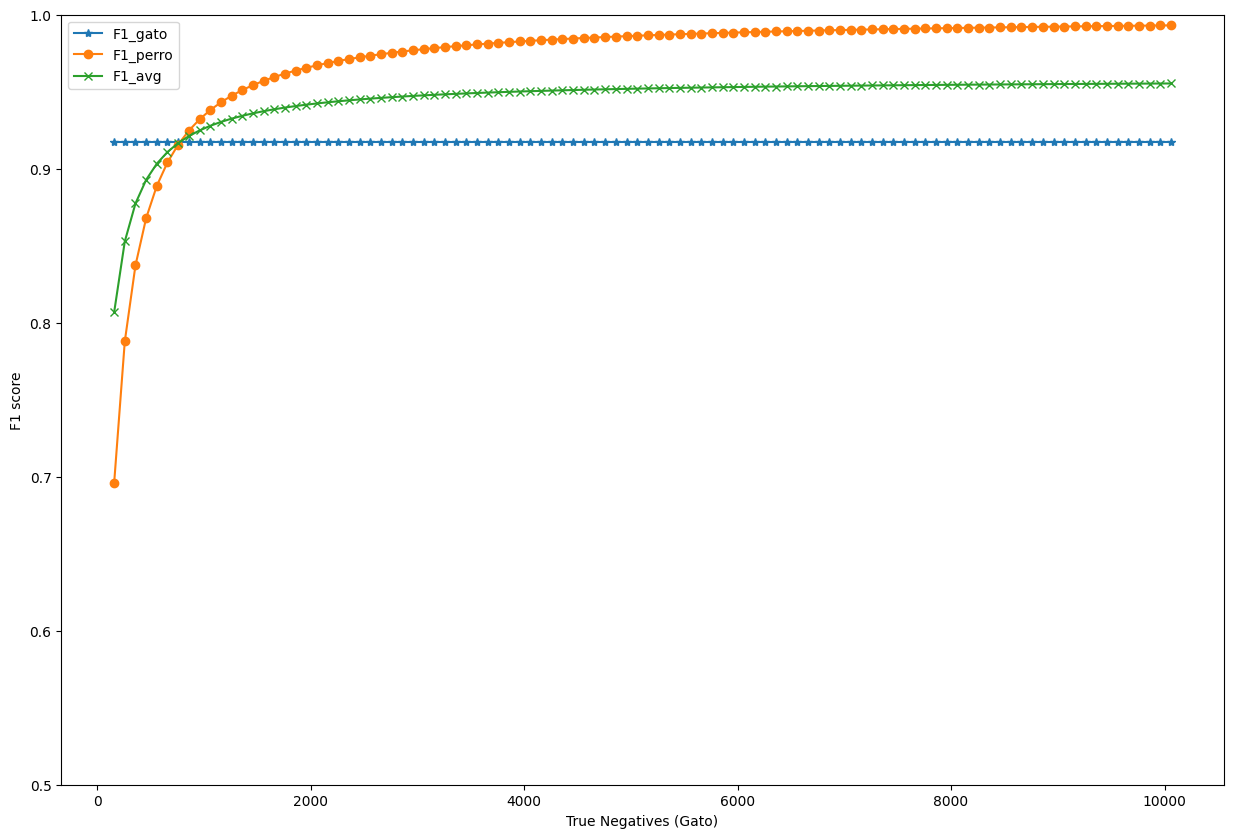

In [29]:
plt.figure(figsize=(15, 10))

plt.plot(tns_gato, f1s_gato, "*-", label="F1_gato")
plt.plot(tns_gato, f1s_perro, "o-", label="F1_perro")
plt.plot(tns_gato, f1s_avg, "x-", label="F1_avg")
plt.xlabel("True Negatives (Gato)")
plt.ylabel("F1 score")
plt.ylim([0.5,1])
plt.legend()
plt.show()


Conclusiones del grafico que esperabamos que pase :

- F1 Gato (naranja): se mantiene estable alrededor de 0.91, porque el clasificador ya es bastante bueno para gatos y agregar perros no cambia mucho ese desempeño.

- F1 Perro (celeste): empieza bajo (~0.70) y va aumentando hasta casi 1.0 cuando agregamos muchísimos perros, porque el clasificador acierta cada vez más en la clase minoritaria.

- F1 Promedio (verde): arranca bajo (promedio entre ambos) y va subiendo a medida que la clase perro gana peso.

Cosas que me debo llevar de este notebook :

1. El objetivo es que entiendas cómo evaluar clasificadores más allá de la simple exactitud (accuracy), usando:
- Matriz de confusión
- Métricas derivadas: precision, recall, F1-score, Fβ
- Cómo cambian estas métricas según el balance de clases y los errores del modelo.

2. Métricas de evaluación

Accuracy = (TP + TN) / total
→ Qué porcentaje de casos acertó el modelo en total.
⚠️ Puede ser engañosa en datasets desbalanceados (ejemplo: 95% “no spam”).

Precision = TP / (TP + FP)
→ De todos los positivos que predije, ¿cuántos eran realmente positivos?
Importa cuando los falsos positivos son costosos (ej: marcar un mail bueno como spam).

Recall = TP / (TP + FN)
→ De todos los positivos reales, ¿cuántos detecté?
Importa cuando los falsos negativos son costosos (ej: dejar pasar un spam).

F1 = media armónica de precision y recall
→ Sirve para equilibrar ambos, útil en datasets desbalanceados.

Fβ → Variante de F1 que te permite darle más peso a precision (β < 1) o a recall (β > 1).

Lección: la elección de la clase positiva y de la métrica cambia la interpretación de qué modelo es mejor.

Lección: en datasets desbalanceados, métricas como accuracy engañan. Es clave usar precision, recall, F1 y, a veces, mirar el promedio entre clases
